## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (Empresa Data Driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m² com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

## 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
df = pd.read_csv('../dataframe/aptos.csv')

###Compreendendo DataFrame

In [ ]:
df.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


In [ ]:
#Identificando valores nulos
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     114 non-null    int64  
 1   valor      113 non-null    float64
 2   quartos    114 non-null    int64  
 3   vagas      114 non-null    int64  
 4   reformado  113 non-null    float64
 5   bairro     114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


metros       0
valor        1
quartos      0
vagas        0
reformado    1
bairro       0
dtype: int64

In [ ]:
df.describe()

,metros,valor,quartos,vagas,reformado
count,114.000000,113.000000,114.000000,114.000000,113.000000
mean,79.500000,401.539823,2.543860,1.675439,0.513274
std,27.516126,171.370059,0.582037,0.722528,0.502050
min,43.000000,188.000000,1.000000,0.000000,0.000000
25%,56.000000,255.000000,2.000000,1.000000,0.000000
50%,71.000000,347.000000,3.000000,2.000000,1.000000
75%,99.000000,515.000000,3.000000,2.000000,1.000000
max,199.000000,880.000000,4.000000,4.000000,1.000000


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)

###**Resposta:**

* Metros: Tamanho do imóvel em m²
* Valor: Valor do imóvel (em milhares de R$) (Variável Alvo)
* Quartos: Número de quartos do imóvel
* Vagas: Número de vagas de automóveis que o imóvel possui
* Reformado: Se o imóvel foi reformado (0 = não, 1 = sim)
* Bairro: Localização do imóvel 

###Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.

###**Resposta:**

1.  Imóveis maiores tendem a ser mais caros.
2.  Imóveis reformados tendem a ser mais caros.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

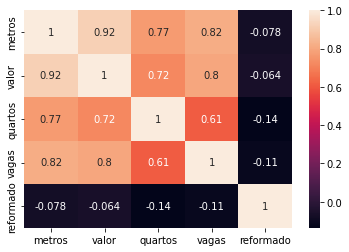

In [ ]:
#Caso 1: Imóveis maiores tendem a ser mais caros

sns.heatmap(df.corr(), annot=True)
plt.show()

* Caso 1: Analisando-se o heatmap, é possivel perceber uma forte correlação (0.92) entre o preço e o tamanho do imóvel, sendo essa correlação diretamente proporcional.

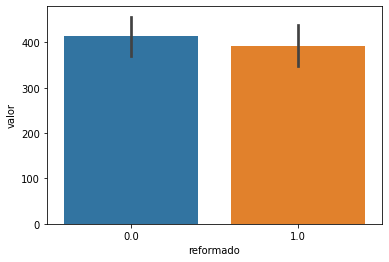

In [ ]:
#Caso 2: Imóveis reformados tendem a ser mais caros

sns.barplot(data=df, x="reformado", y="valor")

plt.show()

* Caso 2: Com base no barplot, é possível se observar 2 possibilidades:
  * Há uma fraca correlação entre o imóvel ter sido reformado e seu preço, com tendência inversa (caso tenha sido reformado, o valor do imóvel tende a ser menor);
  * Não há uma correlação entre o valor do imóvel e o fato dele ter sido reformado.

### __(BONUS: 1 ponto extra)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

###Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

In [ ]:
#Tratando os valores nulos
df_trat=df.dropna()
df_trat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     112 non-null    int64  
 1   valor      112 non-null    float64
 2   quartos    112 non-null    int64  
 3   vagas      112 non-null    int64  
 4   reformado  112 non-null    float64
 5   bairro     112 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 6.1+ KB


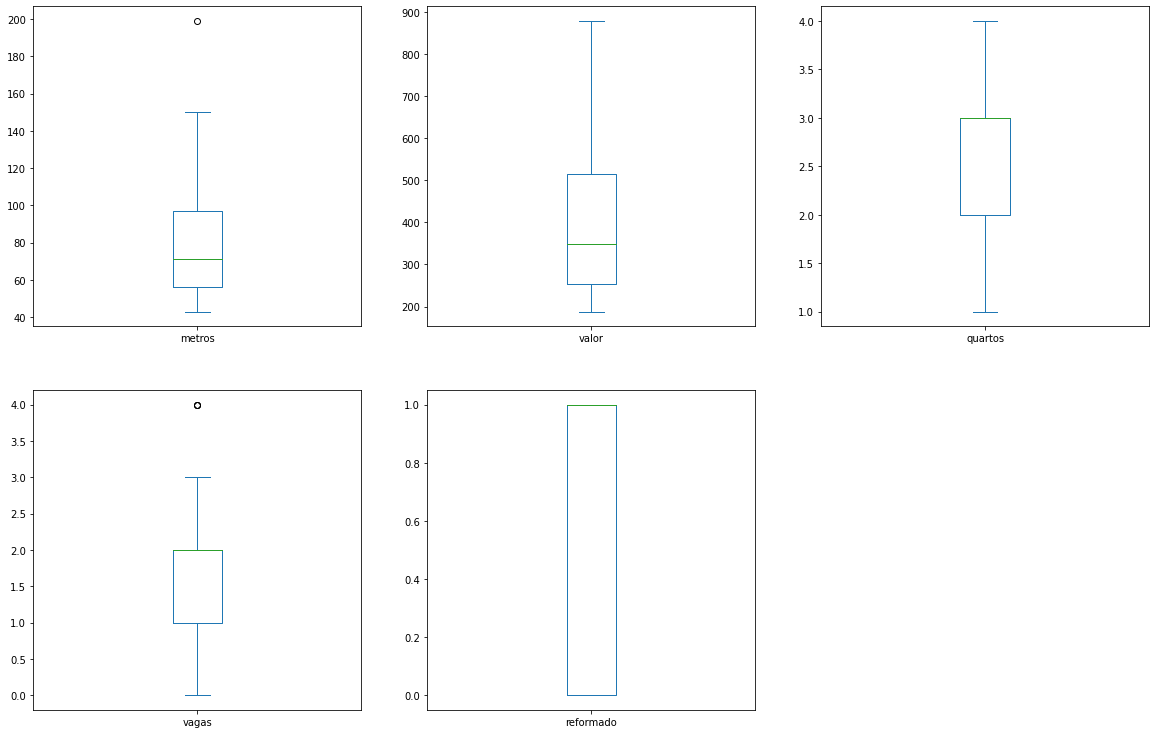

In [ ]:
#Identificando outliers
df_trat.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

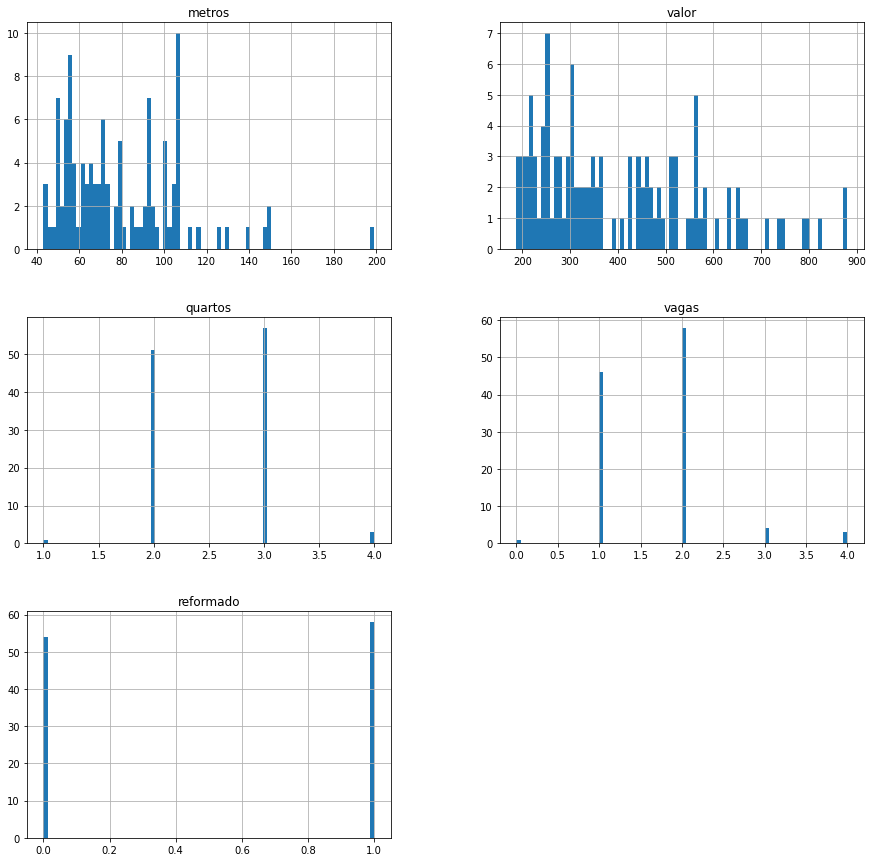

In [ ]:
df_trat.hist(bins=80, figsize=(15, 15))
plt.show()

###Resposta
* Sim, foram localizados outliers em "quartos", "vagas" e "valor";
* Foram utilizados tanto boxplot, para identificar se haviam outliers, como histrogramas, para identificar sua ocorrência;
* Não houve tratameto dos outliers, uma vez que tem pouca representatividade. 

## 3. Desenvolvimento do Modelo

###O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para determinação do valor de um imóvel? Por que ?

###**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

* O modelo supervisionado é o mais adequado, pois iremos informar os parâmetros que a máquina utilizará para fazer a predição.

###Qual a técnica sugerida para este projeto?

###**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

* A técnica de regressão é a mais adequada, pois deseja-se estimar um valor numérico.

###Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

###**Resposta:**

1. Árvores de regressão (Regression Trees);
2. Floresta aleatória de regressão (Random Forest Regression).

###__(BONUS: 1 ponto extra.)__ Explique como cada algoritmo funciona.

###**Resposta:**

1. Este modelo consiste em uma árvore de decisão que, em treinamento, observa diferentes características dos itens no DataFrame para poder, em execução, poder predizer o valor do alvo;

2. Este modelo consiste em utilizar o modelo de Regression Trees em larga escala e com avaliações diversas. Em seguida, os resultados são coletados e faz-se uma predição com base no valor médio obtido com as Trees. 

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [ ]:
df_treino_teste=pd.get_dummies(df_trat,columns=["bairro"])
df_treino_teste

,metros,valor,quartos,vagas,reformado,bairro_Assuncao,bairro_Baeta Neves,bairro_Centro,bairro_Demarchi,bairro_Ferrazopolis,...,bairro_Jardim do Mar,bairro_Jordanopolis,bairro_Nova Petropolis,bairro_Pauliceia,bairro_Piraporinha,bairro_Planalto,bairro_Rudge Ramos,bairro_Santa Teresinha,bairro_Taboao,bairro_Vila Lusitania
0,107,560.0,3,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,107,555.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,196.0,2,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,104,515.0,3,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92,560.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,56,247.0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
111,126,736.0,3,3,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,96,560.0,3,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df_treino_teste.drop("valor",axis = 1)
y = df_treino_teste.valor

In [ ]:
#Separando treino e teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2, random_state=42)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1 -> Árvore de Decisão de Regressão

In [ ]:
#Importando
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

dtr = DecisionTreeRegressor()

In [ ]:
#Fazendo "fit" nos dados
dtr.fit(x_treino, y_treino)

DecisionTreeRegressor()

In [ ]:
# Utilizando método predict em treino
y_teste_predito_forest = dtr.predict(x_treino)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito_forest))

Predição usando regressão, retorna valores continuos: [250.         245.         807.5        270.         322.
 460.         319.         300.         798.         255.
 425.         341.33333333 277.         215.         280.
 247.         249.         340.         250.         580.
 450.         710.         565.         220.         560.
 199.         341.33333333 302.         659.         306.
 456.75       280.         367.         330.         456.75
 272.         341.33333333 303.         340.         495.
 515.         247.5        880.         220.         635.
 365.         480.         565.         509.         347.
 227.         303.         456.75       602.5        247.
 736.         580.         300.         515.         215.
 199.         210.         390.         250.         460.
 245.         520.         750.         807.5        422.
 602.5        525.         485.         196.         485.
 195.         200.         217.         307.         456.75
 667.         

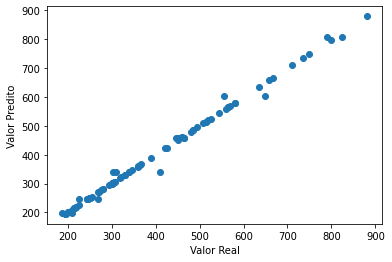

In [ ]:
#Avaliando parâmetros em treino

plt.scatter(y_treino, y_teste_predito_forest)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.show()

In [ ]:
#Analisando resultados em treino

sse = np.sum((y_teste_predito_forest - y_treino)**2)
mse = mean_squared_error(y_treino, y_teste_predito_forest)
mae = mean_absolute_error(y_treino, y_teste_predito_forest)
rmse = np.sqrt(mean_squared_error(y_treino, y_teste_predito_forest))
r2 = r2_score(y_teste_predito_forest, y_treino)

print(f"Soma dos Erros ao Quadrado (SSE): {sse:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"R2-score: {r2:.2%}")

Soma dos Erros ao Quadrado (SSE): 13746.92
Erro Quadrático Médio (MSE): 154.46
Erro Médio Absoluto (MAE): 4.13
Raiz do Erro Quadrático Médio (RMSE): 12.43
R2-score: 99.47%


In [ ]:
# Utilizando método predict em teste

y_teste_predito = dtr.predict(x_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))

Predição usando regressão, retorna valores continuos: [565.   220.   545.   456.75 294.   347.   515.   294.   422.   247.
 220.   495.   196.   710.   515.   485.   456.75 710.   250.   750.
 250.   340.   390.  ]


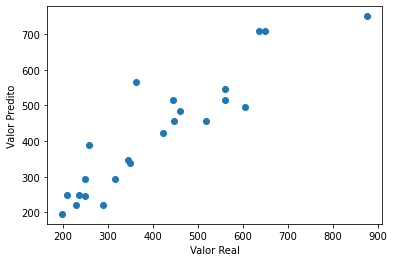

In [ ]:
#Avaliando parâmetros em teste

plt.scatter(y_teste, y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.show()

In [ ]:
#Analisando resultados em teste

sse = np.sum((y_teste_predito - y_teste)**2)
mse = mean_squared_error(y_teste, y_teste_predito)
mae = mean_absolute_error(y_teste, y_teste_predito)
rmse = np.sqrt(mean_squared_error(y_teste, y_teste_predito))
r2 = r2_score(y_teste_predito, y_teste)

print(f"Soma dos Erros ao Quadrado (SSE): {sse:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"R2-score: {r2:.2%}")

Soma dos Erros ao Quadrado (SSE): 115937.12
Erro Quadrático Médio (MSE): 5040.74
Erro Médio Absoluto (MAE): 49.74
Raiz do Erro Quadrático Médio (RMSE): 71.00
R2-score: 80.89%


### Algoritmo 2 -> Floresta Aleatória

In [ ]:
#Importando
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [ ]:
#Fazendo "fit" nos dados
rfr.fit(x_treino, y_treino)

RandomForestRegressor()

In [ ]:
# Utilizando método predict em treino
y_teste_predito_forest = rfr.predict(x_treino)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito_forest))

Predição usando regressão, retorna valores continuos: [242.55       232.91833333 794.53583333 287.46333333 312.1875
 485.434      313.53       269.29       714.125      250.28
 489.67333333 338.65057143 268.1        226.18       268.03
 248.97       245.37666667 329.686      271.08       555.42
 520.89       662.585      476.23414286 243.2125     537.398
 205.11266667 338.65057143 276.2525     583.15       306.91
 456.76411905 268.38       336.56       314.27083333 456.76411905
 262.43133333 338.65057143 306.07       333.57       513.91
 560.845      249.9175     845.58       231.74       680.91333333
 376.46766667 503.48       546.91166667 524.54       385.59614286
 234.56       306.07       456.76411905 594.54380952 248.97
 726.03       556.56       300.3275     540.14333333 233.17
 205.11266667 215.73833333 396.71114286 241.70333333 468.13442857
 242.63       504.894      704.12142857 794.53583333 460.33
 594.54380952 576.1        467.32714286 205.01       464.3
 205.42       216.34

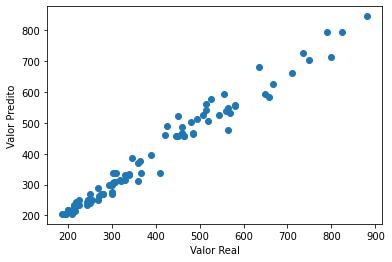

In [ ]:
#Avaliando parâmetros em treino

plt.scatter(y_treino, y_teste_predito_forest)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.show()

In [ ]:
#Analisando resultados em treino

sse = np.sum((y_teste_predito_forest - y_treino)**2)
mse = mean_squared_error(y_treino, y_teste_predito_forest)
mae = mean_absolute_error(y_treino, y_teste_predito_forest)
rmse = np.sqrt(mean_squared_error(y_treino, y_teste_predito_forest))
r2 = r2_score(y_teste_predito_forest, y_treino)

print(f"Soma dos Erros ao Quadrado (SSE): {sse:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"R2-score: {r2:.2%}")

Soma dos Erros ao Quadrado (SSE): 77797.80
Erro Quadrático Médio (MSE): 874.13
Erro Médio Absoluto (MAE): 21.87
Raiz do Erro Quadrático Médio (RMSE): 29.57
R2-score: 96.68%


In [ ]:
# Utilizando método predict em teste
y_teste_predito_forest = rfr.predict(x_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito_forest))

Predição usando regressão, retorna valores continuos: [471.89040476 240.6875     527.119      456.76411905 304.265
 427.59114286 560.845      296.4825     460.33       248.97
 243.2125     513.91       212.43466667 599.49833333 550.37416667
 467.32714286 456.76411905 600.88       242.64       654.755
 243.34       329.686      400.42633333]


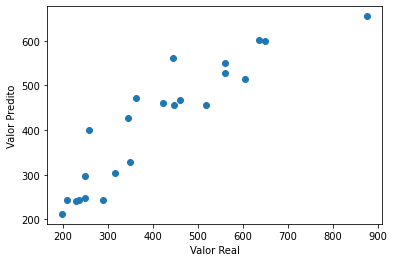

In [ ]:
#Avaliando parâmetros em teste

plt.scatter(y_teste, y_teste_predito_forest)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.show()

In [ ]:
#Analisando resultados em teste

sse = np.sum((y_teste_predito_forest - y_teste)**2)
mse = mean_squared_error(y_teste, y_teste_predito_forest)
mae = mean_absolute_error(y_teste, y_teste_predito_forest)
rmse = np.sqrt(mean_squared_error(y_teste, y_teste_predito_forest))
r2 = r2_score(y_teste_predito_forest, y_teste)

print(f"Soma dos Erros ao Quadrado (SSE): {sse:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"R2-score: {r2:.2%}")

Soma dos Erros ao Quadrado (SSE): 125693.24
Erro Quadrático Médio (MSE): 5464.92
Erro Médio Absoluto (MAE): 51.88
Raiz do Erro Quadrático Médio (RMSE): 73.93
R2-score: 70.15%


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

###**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino (R²) | 99.47% | 96.68% |
| teste (R²)  | 80.89% | 70.15% |

###Qual dos algoritmos obteve um resultado melhor? Justifique

###**Resposta:** 
O segundo algorítimo, Random Forest, atingiu um melhor resultado;

Não só teve um R² score maior, tendo uma menor taxa de erros, como ele tende a ser mais confiável, uma vez que seu algorítmo consiste em diversas Regression Trees com inúmeras combinações de nós de decisão, diminuindo a chance de uma predição enviesada.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
df_treino_teste.columns

Index(['metros', 'valor', 'quartos', 'vagas', 'reformado', 'bairro_Assuncao',
       'bairro_Baeta Neves', 'bairro_Centro', 'bairro_Demarchi',
       'bairro_Ferrazopolis', 'bairro_Independencia', 'bairro_Iraja',
       'bairro_Jardim do Mar', 'bairro_Jordanopolis', 'bairro_Nova Petropolis',
       'bairro_Pauliceia', 'bairro_Piraporinha', 'bairro_Planalto',
       'bairro_Rudge Ramos', 'bairro_Santa Teresinha', 'bairro_Taboao',
       'bairro_Vila Lusitania'],
      dtype='object')

In [ ]:
#Ignorar warning
import warnings
warnings.simplefilter("ignore")

In [ ]:
#Valor
print(f"Valor predito: R${(dtr.predict([[72,2,2,1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])[0])*1000:.2f}")

Valor predito: R$330000.00


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


###O modelo desenvolvido obteve um resultado satisfatório? Justifique:


###**Resposta**:
Sim, o resultado foi satisfatório, pois ambos os modelos atingiram uma taxa de acerto superior a 70% na taxa R² score, sendo o primeiro algorítmo, de Regression Tree, atingiu 80.89% de acerto, no mesmo parâmetro.

###O que faria diferente para melhorar resultado obtido? Justifique:


###**Resposta**:
Uma possibilidade seria tratar os outliers, uma vez que eles podem ter alterado algum nó de decisão de uma ou mais trees do modelo de Random Forrest.

Outra possibilidade seria fazer um subdataset sem o campo "reformado", uma vez que foi observado que esse campo pouco ou nada muda o valor doo imóvel, podendo ter causado algum viés no treinamento.